In [13]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
calc_date = ql.Date(16,8,2016)
ql.Settings.instance().evaluationDate = calc_date

For simplicity, let us assume that the interest rate term structure is a flat yield curve at 3.5%

In [3]:
day_count = ql.ActualActual(ql.ActualActual.Bond)
rate = 0.035
ts = ql.FlatForward(calc_date, rate,
day_count, ql.Compounded,
ql.Semiannual)
ts_handle = ql.YieldTermStructureHandle(ts)

In [5]:
# The call and put schedules for the callable bond is created as shown below. We create a container
# for holding all the call and put dates using the CallabilitySchedule class. You can add each call
# using Callability class and noting as Callability.Call or Callability.Put for either a call
# or put.

callability_schedule = ql.CallabilitySchedule()
call_price = 100.0
call_date = ql.Date(15,ql.September,2016);
null_calendar = ql.NullCalendar();
for i in range(0,24):
    callability_price = ql.BondPrice(
        call_price, ql.BondPrice.Clean
    )
    callability_schedule.append(
        ql.Callability(callability_price,
                       ql.Callability.Call,
                       call_date)
    )
    call_date = null_calendar.advance(
        call_date, 3, ql.Months
    )

In [6]:
issue_date = ql.Date(16,ql.September,2014)
maturity_date = ql.Date(15,ql.September,2022)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
tenor = ql.Period(ql.Quarterly)
accrual_convention = ql.Unadjusted
schedule = ql.Schedule(
    issue_date, maturity_date, tenor,
    calendar, accrual_convention,
    accrual_convention,
    ql.DateGeneration.Backward, False
)

## Instantiate the Callable Class

In [9]:
settlement_days = 3
face_amount = 100
accrual_daycount = ql.ActualActual(ql.ActualActual.Bond)
coupon = 0.025
bond = ql.CallableFixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount,
    ql.Following, face_amount, issue_date,
    callability_schedule
)

In [10]:
def value_bond(a, s, grid_points, bond):
    model = ql.HullWhite(ts_handle, a, s)
    engine = ql.TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond


In [11]:
# The callable bond value for a 3% mean reversion and 12% volatility is shown below
value_bond(0.03, 0.12, 40, bond)
print("Bond price: %lf" % bond.cleanPrice())


Bond price: 68.318102


In [12]:
sigmas = np.arange(0.001, 0.15, 0.001)
prices = [
    value_bond(0.03, s, 40, bond).cleanPrice()
    for s in sigmas
]

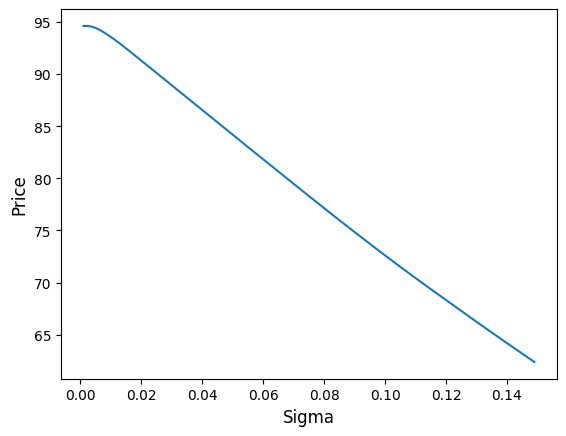

In [14]:

plt.plot(sigmas, prices)
plt.xlabel("Sigma", size=12)
plt.ylabel("Price", size=12)
plt.show()

The static cash flows can be accessed using the cashflows accessor.

In [15]:
from pandas import DataFrame
DataFrame(
    [(cf.date(), cf.amount()) for cf in bond.cashflows()],
    columns=["Date", "Amount"],
    index=range(1, len(bond.cashflows())+1)
)


,Date,Amount
1,"December 15th, 2014",0.618132
2,"March 16th, 2015",0.625000
3,"June 15th, 2015",0.625000
4,"September 15th, 2015",0.625000
5,"December 15th, 2015",0.625000
6,"March 15th, 2016",0.625000
7,"June 15th, 2016",0.625000
8,"September 15th, 2016",0.625000
9,"December 15th, 2016",0.625000
10,"March 15th, 2017",0.625000
